In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
project_path = "/content/drive/My Drive/DataScienceProjects/spotify-song-analysis"
data_path = f"{project_path}/data"

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv(f"{data_path}/songs_normalize.csv")

In [78]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [79]:
df['genre_simple'] = df['genre'].str.split(', ').str[0].explode()
df['genre_simple'].value_counts().head()

,count
genre_simple,
pop,936
hip hop,776
rock,162
Dance/Electronic,41
set(),22


In [80]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness']

genre_year = df.groupby(['year', 'genre_simple'])[features].mean().reset_index()
genre_year.head()

,year,genre_simple,danceability,energy,valence,tempo,acousticness,speechiness
0,1998,hip hop,0.727000,0.445000,0.527000,81.125000,0.339000,0.291000
1,1999,Dance/Electronic,0.808000,0.982000,0.961000,124.999000,0.058500,0.031100
2,1999,hip hop,0.785857,0.745143,0.608000,129.879429,0.142086,0.150557
3,1999,pop,0.638913,0.711870,0.539013,122.853826,0.167421,0.044861
4,1999,rock,0.632000,0.773167,0.594167,118.056000,0.035063,0.064700


In [81]:
genre_counts = df.groupby('genre_simple').size()
popular_genres = genre_counts[genre_counts > 30].index.tolist()

genre_year_filtered = genre_year[genre_year['genre_simple'].isin(popular_genres)]

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

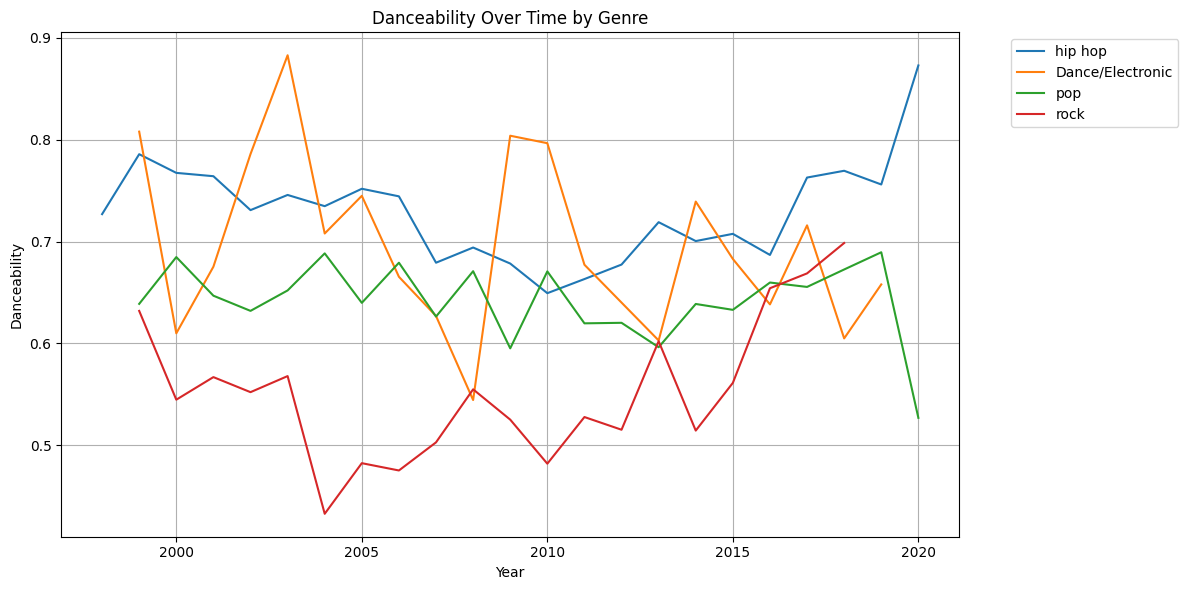

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='danceability', hue='genre_simple',)
plt.title("Danceability Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

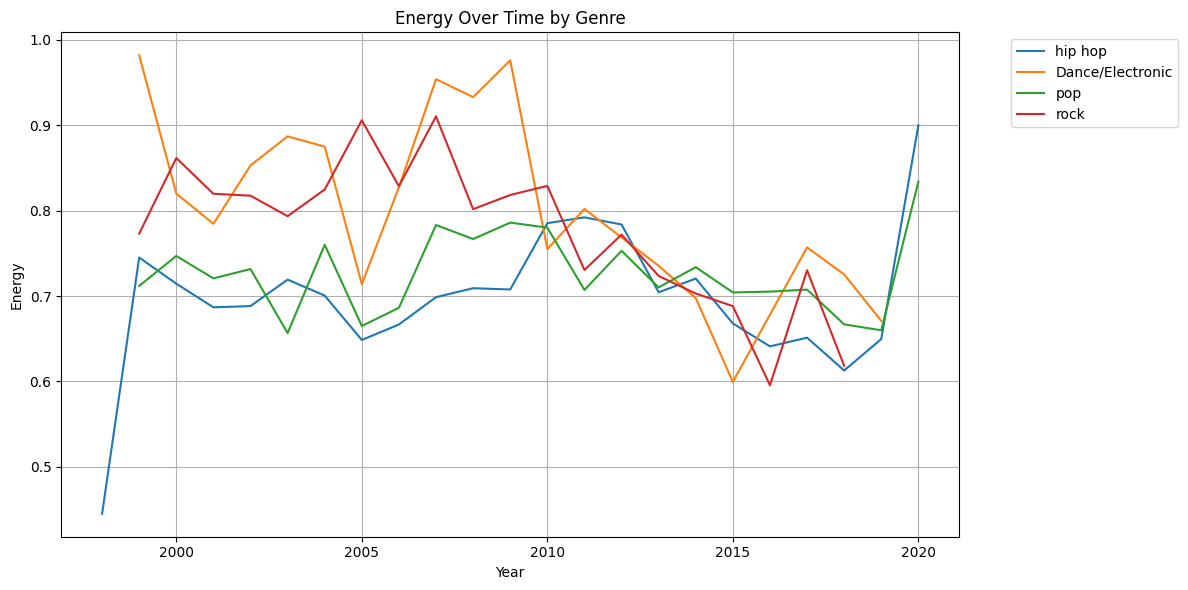

In [84]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='energy', hue='genre_simple',)
plt.title("Energy Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

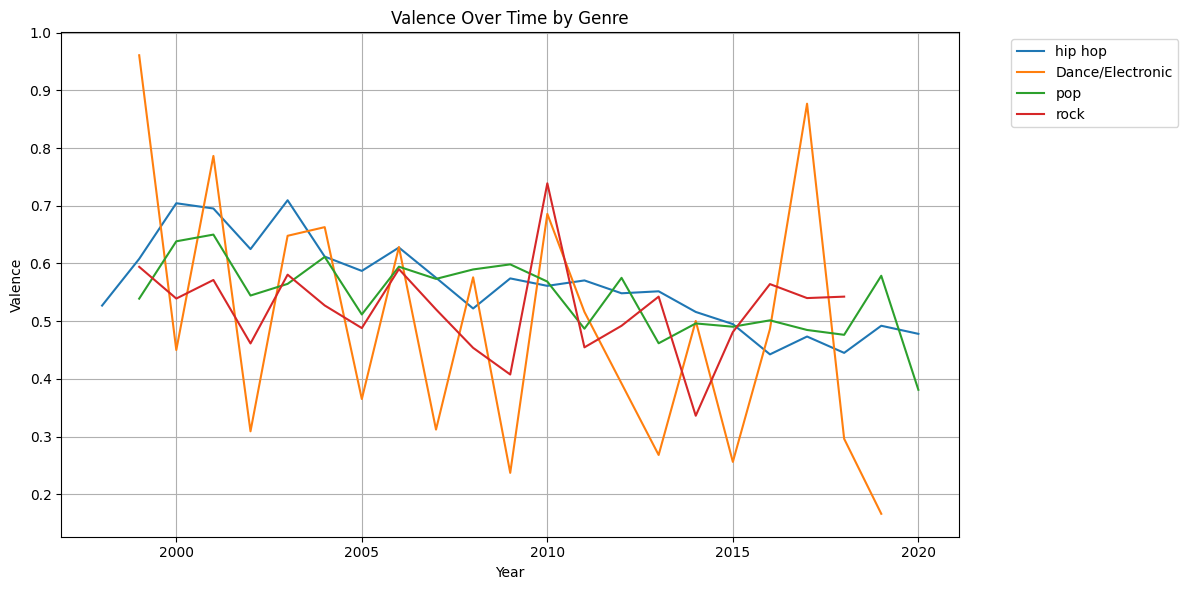

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='valence', hue='genre_simple',)
plt.title("Valence Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Valence")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

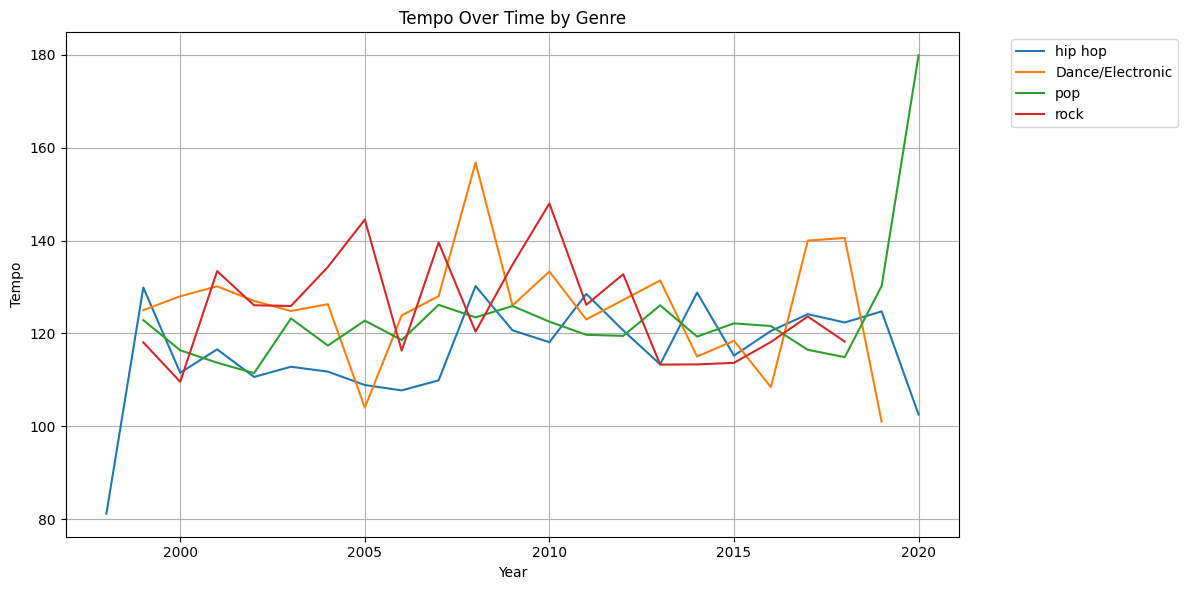

In [86]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='tempo', hue='genre_simple',)
plt.title("Tempo Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Tempo")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

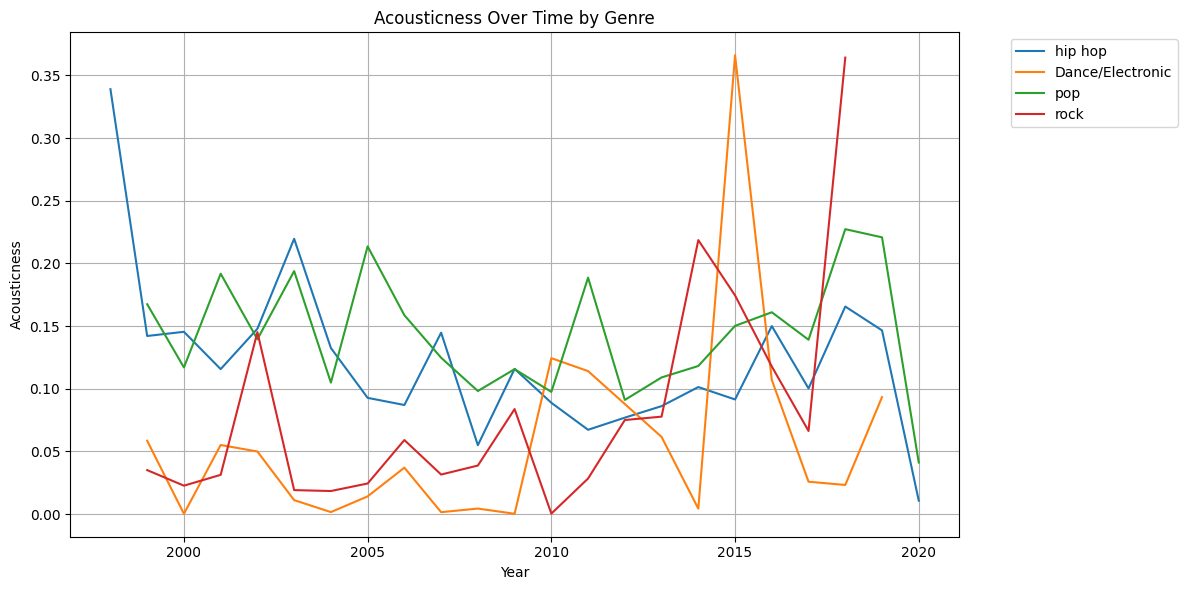

In [87]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='acousticness', hue='genre_simple',)
plt.title("Acousticness Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Acousticness")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

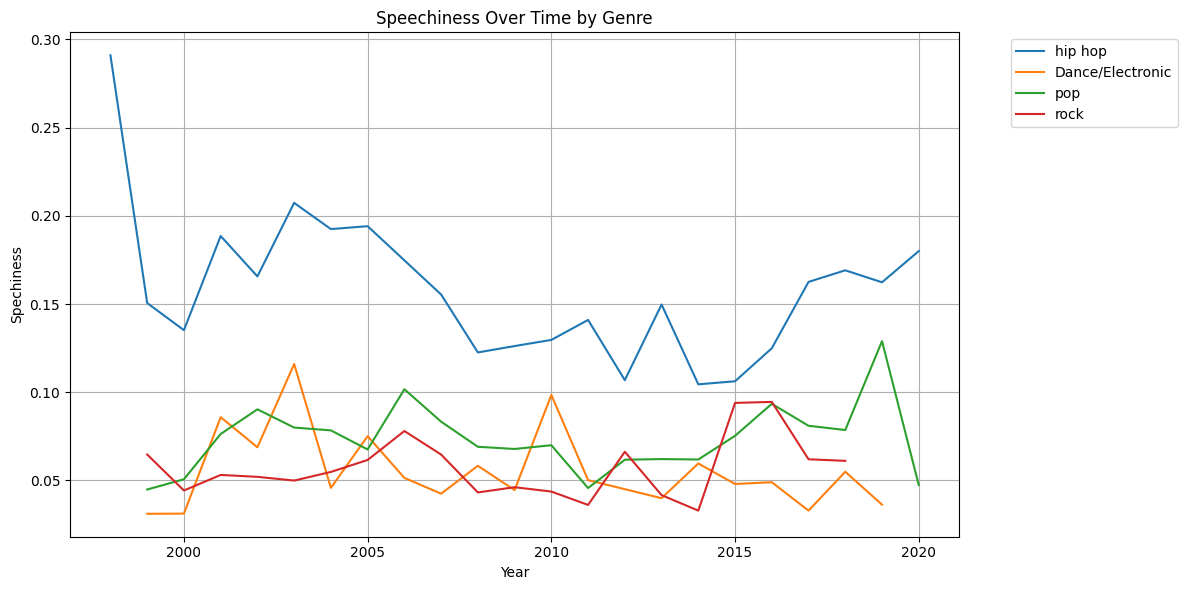

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_filtered, x='year', y='speechiness', hue='genre_simple',)
plt.title("Speechiness Over Time by Genre")
plt.xlabel("Year")
plt.ylabel("Spechiness")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.03, 'Energy Trend By Genre')

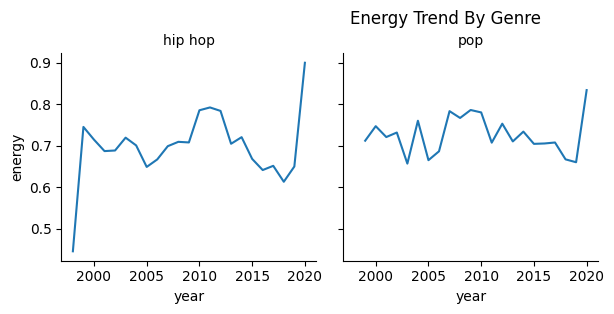

In [89]:
g = sns.FacetGrid(genre_year_filtered[genre_year_filtered['genre_simple'].isin(['pop', 'hip hop'])], col = 'genre_simple', col_wrap = 3)
g.map(sns.lineplot, "year", "energy")
g.set_titles("{col_name}")
g.fig.suptitle("Energy Trend By Genre", y = 1.03)

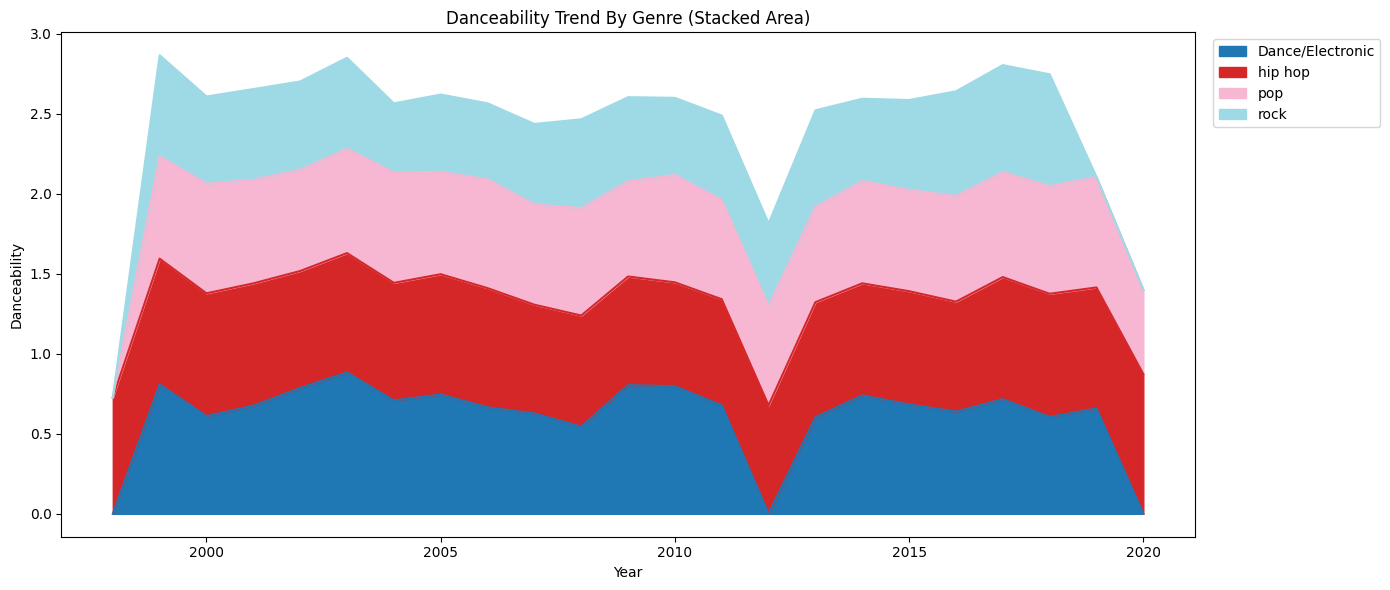

In [90]:
pivot_df = genre_year_filtered.pivot(index='year', columns='genre_simple', values='danceability').fillna(0)

pivot_df.plot(kind = 'area', stacked = True, figsize = (14, 6), colormap = 'tab20')
plt.title("Danceability Trend By Genre (Stacked Area)")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.legend(loc = 'upper left', bbox_to_anchor = (1.01, 1))
plt.tight_layout()
plt.show()

Observations:
*   The average of audio features by genre fluctuates constantly over the years.
*   Energy for hip hop started low before gaining a signifianct increase between the year 1998 - 1999, then fluctuated between 2000 - 2017, and ended up having an exponential increase from 2018 to 2020.
*   Dance/Electronic has the highest danceability peaks compared to hip hop, pop, and rock.